# What is PyTorch

## Getting started

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  3.6893e+19  0.0000e+00
 3.6893e+19  5.6052e-45  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 2.5748e-23 -3.6902e+19  2.5753e-23
[torch.FloatTensor of size 5x3]



In [3]:
x = torch.randn(5, 3)
print(x)


-2.1070 -1.6552  1.0289
-0.3311  0.7344 -1.2677
-1.5866 -0.2743  1.2814
-0.8138  0.4520  0.2293
-1.0670  1.6991  0.5056
[torch.FloatTensor of size 5x3]



In [4]:
print(x.size())

torch.Size([5, 3])


In [5]:
y = torch.randn(5, 3)

In [6]:
print(x + y)


-4.1505 -1.8446  2.2065
-0.9413 -0.1080 -1.8802
-2.2071 -0.1146  2.3804
-0.9369 -0.5026 -0.8517
-0.4570  1.6256  0.8134
[torch.FloatTensor of size 5x3]



In [7]:
print(torch.add(x, y))


-4.1505 -1.8446  2.2065
-0.9413 -0.1080 -1.8802
-2.2071 -0.1146  2.3804
-0.9369 -0.5026 -0.8517
-0.4570  1.6256  0.8134
[torch.FloatTensor of size 5x3]



In [8]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


-4.1505 -1.8446  2.2065
-0.9413 -0.1080 -1.8802
-2.2071 -0.1146  2.3804
-0.9369 -0.5026 -0.8517
-0.4570  1.6256  0.8134
[torch.FloatTensor of size 5x3]



In [9]:
y.add_(x)
print(y)


-4.1505 -1.8446  2.2065
-0.9413 -0.1080 -1.8802
-2.2071 -0.1146  2.3804
-0.9369 -0.5026 -0.8517
-0.4570  1.6256  0.8134
[torch.FloatTensor of size 5x3]



In [10]:
print(x[:, 1])


-1.6552
 0.7344
-0.2743
 0.4520
 1.6991
[torch.FloatTensor of size 5]



In [11]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [12]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [13]:
a.add_(1)
print(a)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]



In [14]:
print(b)

[ 2.  2.  2.  2.  2.]


In [15]:
import numpy as np

In [16]:
a = np.ones(5)

In [17]:
b = torch.from_numpy(a)

In [18]:
np.add(a, 1, out = a)

array([ 2.,  2.,  2.,  2.,  2.])

In [19]:
print(a)

[ 2.  2.  2.  2.  2.]


In [20]:
print(b)


 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



## Autograd: automatic differentiation

In [21]:
import torch
from torch.autograd import Variable

In [25]:
x = Variable(torch.ones(2, 2), requires_grad = True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [26]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [38]:
print(y.grad)

None


In [37]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [31]:
z = y * y * 3

In [32]:
print(z)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]



In [33]:
out = z.mean()
print(out)

Variable containing:
 27
[torch.FloatTensor of size 1]



In [34]:
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [35]:
out.backward()

In [36]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [39]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)
print(x)

Variable containing:
 0.8866
 1.4020
-0.6064
[torch.FloatTensor of size 3]



In [40]:
y = x * 2

In [41]:
print(y)

Variable containing:
 1.7732
 2.8040
-1.2128
[torch.FloatTensor of size 3]



In [42]:
while y.data.norm() < 1000:
    y = y * 2
print(y)

Variable containing:
  907.8700
 1435.6587
 -620.9705
[torch.FloatTensor of size 3]



In [43]:
gradients = torch.FloatTensor([0.1, 1.0, 0.00001])
y.backward(gradients)
print(x.grad)

Variable containing:
 1.0240e+02
 1.0240e+03
 1.0240e-02
[torch.FloatTensor of size 3]



## Neural Networks

In [44]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [54]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input channel, 6 output channels, 5*5 squire convolution kernal
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # an afine operation
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # max pooling over a 2 * 2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a squre you can only specify a single number. 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)
        

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [55]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [56]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
1.00000e-02 *
  3.0836  9.3480  4.5327 -9.2408 -1.9529  4.8289  5.4427 -4.7590 -3.1223  8.2055
[torch.FloatTensor of size 1x10]



In [57]:
net.zero_grad()

In [58]:
out.backward(torch.randn(1, 10))

In [59]:
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

In [60]:
loss = criterion(output, target)
print(loss)

Variable containing:
 38.3604
[torch.FloatTensor of size 1]



In [63]:
net.zero_grad()

In [64]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
-0.0370
 0.0350
 0.0237
-0.0805
 0.1212
-0.0508
[torch.FloatTensor of size 6]



In [65]:
import torch.optim as optim

# create your own optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()


## Training a classifier

In [66]:
import torch
import torchvision
import torchvision.transforms as transforms

In [67]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


 bird  deer  bird  deer


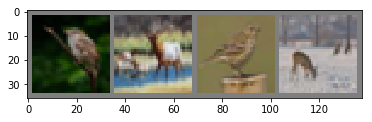

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show image
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [69]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [71]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

In [72]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [74]:
for epoch in range(2):
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the input
        inputs, labels = data
        
        # wrap them in Varibales
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print ('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training.')

[1,  2000] loss: 2.221
[1,  4000] loss: 1.834
[1,  6000] loss: 1.692
[1,  8000] loss: 1.592
[1, 10000] loss: 1.494
[1, 12000] loss: 1.469
[2,  2000] loss: 1.382
[2,  4000] loss: 1.360
[2,  6000] loss: 1.343
[2,  8000] loss: 1.312
[2, 10000] loss: 1.295
[2, 12000] loss: 1.273
Finished Training.


 frog   car  deer horse


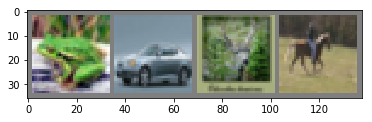

In [80]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [81]:
outputs = net(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print ('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]] for j in range(4)))

Predicted:   frog   car  frog  deer


In [83]:
correct = 0
total = 0

for data in trainloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network for the 10000 test images: %d %%' % (100 * correct/total))

Accuracy of the network for the 10000 test images: 57 %


In [84]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 77 %
Accuracy of  bird : 44 %
Accuracy of   cat : 27 %
Accuracy of  deer : 37 %
Accuracy of   dog : 37 %
Accuracy of  frog : 68 %
Accuracy of horse : 67 %
Accuracy of  ship : 75 %
Accuracy of truck : 51 %
